In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
pip install scikit-learn


In [7]:
import pandas as pd
file_path = '/content/drive/MyDrive/BBB dataset/B3DB_regression.tsv'
total = pd.read_csv(file_path, delimiter='\t', encoding='utf-8', on_bad_lines='skip')



In [8]:
total

,NO.,compound_name,IUPAC_name,SMILES,CID,logBB,Inchi,reference,group,comments
0,1,moxalactam,7-[[2-carboxy-2-(4-hydroxyphenyl)acetyl]amino]...,CN1C(=NN=N1)SCC2=C(N3C(C(C3=O)(NC(=O)C(C4=CC=C...,3889.0|,-2.52,InChI=1S/C20H20N6O9S/c1-25-19(22-23-24-25)36-8...,R25|,A,NaN
1,2,schembl614298,"(2s,3s,4s,5r)-6-[[(4r,4ar,7s,7ar,12bs)-7-hydro...",CN1CC[C@]23[C@@H]4[C@H]1CC5=C2C(=C(C=C5)OC6[C@...,18595497.0|,-2.15,InChI=1S/C23H27NO9/c1-24-7-6-23-10-3-4-12(25)2...,R25|,A,NaN
2,3,morphine-6-glucuronide,"(2s,3s,4s,5r)-6-[[(4r,4ar,7s,7ar,12bs)-9-hydro...",CN1CC[C@]23[C@@H]4[C@H]1CC5=C2C(=C(C=C5)O)O[C@...,9847115.0|,-2.09,InChI=1S/C23H27NO9/c1-24-7-6-23-10-3-5-13(31-2...,R25|,A,NaN
3,4,2-[4-(5-bromo-3-methylpyridin-2-yl)butylamino]...,2-[4-(5-bromo-3-methylpyridin-2-yl)butylamino]...,CC1=NC=C(C=C1)CC2CNC(NC2=O)NCCCCC3=NC=C(C=C3C)Br,74041479.0|,-1.88,InChI=1S/C21H28BrN5O/c1-14-9-18(22)13-25-19(14...,R35|,A,NaN
4,5,NaN,NaN,c1(c2c3n(c4c(C(N(C)C3)=O)c(Cl)ccc4)cn2)noc(C(O...,nan|,-1.82,"InChI=1S/C16H14ClN5O4/c1-16(24,25)15-19-13(20-...",R35|,A,NaN
...,...,...,...,...,...,...,...,...,...,...
1053,1054,2qju,"3-(5,6-dihydrobenzo[b][1]benzazepin-11-yl)prop...",C[NH2+]CCCN1C2=CC=CC=C2CCC3=CC=CC=C31,2995.0|2995.0|2995.0|2995.0|2995.0|2995.0|2995...,1.20,InChI=1S/C18H22N2/c1-19-13-6-14-20-17-9-4-2-7-...,R4|R3|R38|R41|R43|R47|R49|R40|R8|R21|R27|R2|R2...,D,NaN
1054,1055,promazine,"n,n-dimethyl-3-phenothiazin-10-ylpropan-1-amine",CN(C)CCCN1C2=CC=CC=C2SC3=CC=CC=C31,4926.0|4926.0|4926.0|4926.0|4926.0|4926.0|4926...,1.23,InChI=1S/C17H20N2S/c1-18(2)12-7-13-19-14-8-3-5...,R3|R4|R50|R40|R38|R41|R8|R21|R27|R2|R2|R27|R3|...,D,NaN
1055,1056,diphenhydramine,"2-benzhydryloxy-n,n-dimethylethanamine",CN(C)CCOC(C1=CC=CC=C1)C2=CC=CC=C2,3100.0|3100.0|3100.0|3100.0|3100.0|3100.0|3100...,1.30,InChI=1S/C17H21NO/c1-18(2)13-14-19-17(15-9-5-3...,R42|R2|R2|R3|R8|R18|R21|R25|R26|R27|R27|R27|R3...,D,NaN
1056,1057,1225-64-5,3-(2-chlorophenothiazin-10-yl)-n-methylpropan-...,CNCCCN1C2=CC=CC=C2SC3=C1C=C(C=C3)Cl,62875.0|62875.0|62875.0|62875.0|62875.0|62875....,1.40,InChI=1S/C16H17ClN2S/c1-18-9-4-10-19-13-5-2-3-...,R18|R26|R27|R4|R11|R12|R20|R25|R35|R36|R39|R43...,D,NaN


In [9]:
!pip install rdkit-pypi
!pip install pandas
!pip install Pillow
!pip install matplotlib
!pip install pydot
!sudo apt-get -qq install graphviz

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 29.4/29.4 MB 29.7 MB/s eta 0:00:00


In [10]:
import os

# Temporary suppress tf logs
os.environ["TF_CPP_MIN_LOG_LEVEL"] = "3"

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
from rdkit import Chem
from rdkit import RDLogger
from rdkit.Chem.Draw import IPythonConsole
from rdkit.Chem.Draw import MolsToGridImage

# Temporary suppress warnings and RDKit logs
warnings.filterwarnings("ignore")
RDLogger.DisableLog("rdApp.*")

np.random.seed(42)
tf.random.set_seed(42)

In [11]:
class Featurizer:
    def __init__(self, allowable_sets):
        self.dim = 0
        self.features_mapping = {}
        for k, s in allowable_sets.items():
            s = sorted(list(s))
            self.features_mapping[k] = dict(zip(s, range(self.dim, len(s) + self.dim)))
            self.dim += len(s)

    def encode(self, inputs):
        output = np.zeros((self.dim,))
        for name_feature, feature_mapping in self.features_mapping.items():
            feature = getattr(self, name_feature)(inputs)
            if feature not in feature_mapping:
                continue
            output[feature_mapping[feature]] = 1.0
        return output


class AtomFeaturizer(Featurizer):
    def __init__(self, allowable_sets):
        super().__init__(allowable_sets)

    def symbol(self, atom):
        return atom.GetSymbol()

    def n_valence(self, atom):
        return atom.GetTotalValence()

    def n_hydrogens(self, atom):
        return atom.GetTotalNumHs()

    def hybridization(self, atom):
        return atom.GetHybridization().name.lower()

    def atomic_number(self,atom):
        return atom.GetAtomicNum()

    def formal_charge(self,atom):
        return atom.GetFormalCharge()

    def degree(self,atom):
        return atom.GetDegree()

    def implicit_valence(self,atom):
        return atom.GetImplicitValence()

    def is_aromatic(self,atom):
        return atom.GetIsAromatic()

    def atomic_mass(self,atom):
        return atom.GetMass()

    def vdw_radius(self,atom):
        vdw_radii={
            'H' : 1.20, 'C' : 1.70, 'N' : 1.55, 'O' : 1.52, 'F' : 1.47,
            'P' : 1.80, 'S' : 1.80, 'Cl' : 1.75, 'Br' : 1.85, 'I' : 1.98
        }
        return vdw_radii.get(atom.GetSymbol(), 0.0)

    def partial_charge(self,atom):
        return float(atom.GetProp("_GasteigerCharge")) if atom.HasProp("_GasteigerCharge") else 0.0

    def is_in_ring(self,atom):
        return atom.IsInRing()

    def chirality(self,atom):
        return atom.GetChiralTag().name.lower()


class BondFeaturizer(Featurizer):
    def __init__(self, allowable_sets):
        super().__init__(allowable_sets)
        self.dim += 1

    def encode(self, bond):
        output = np.zeros((self.dim,))
        if bond is None:
            output[-1] = 1.0
            return output
        output = super().encode(bond)
        return output

    def bond_type(self, bond):
        return bond.GetBondType().name.lower()

    def conjugated(self, bond):
        return bond.GetIsConjugated()


atom_featurizer = AtomFeaturizer(
    allowable_sets={
        "symbol": {"B", "Br", "C", "Ca", "Cl", "F", "H", "I", "N", "Na", "O", "P", "S"},
        "n_valence": {0, 1, 2, 3, 4, 5, 6},
        "n_hydrogens": {0, 1, 2, 3, 4},
        "hybridization": {"s", "sp", "sp2", "sp3"},
    }
)

bond_featurizer = BondFeaturizer(
    allowable_sets={
        "bond_type": {"single", "double", "triple", "aromatic"},
        "conjugated": {True, False},
    }
)


In [15]:

def molecule_from_smiles(smiles):
    # MolFromSmiles(m, sanitize=True) should be equivalent to
    # MolFromSmiles(m, sanitize=False) -> SanitizeMol(m) -> AssignStereochemistry(m, ...)
    molecule = Chem.MolFromSmiles(smiles, sanitize=False)

    # If sanitization is unsuccessful, catch the error, and try again without
    # the sanitization step that caused the error
    flag = Chem.SanitizeMol(molecule, catchErrors=True)
    if flag != Chem.SanitizeFlags.SANITIZE_NONE:
        Chem.SanitizeMol(molecule, sanitizeOps=Chem.SanitizeFlags.SANITIZE_ALL ^ flag)

    Chem.AssignStereochemistry(molecule, cleanIt=True, force=True)
    return molecule


def graph_from_molecule(molecule):
    # Initialize graph
    atom_features = []
    bond_features = []
    pair_indices = []

    for atom in molecule.GetAtoms():
        atom_features.append(atom_featurizer.encode(atom))

        # Add self-loops
        pair_indices.append([atom.GetIdx(), atom.GetIdx()])
        bond_features.append(bond_featurizer.encode(None))

        for neighbor in atom.GetNeighbors():
            bond = molecule.GetBondBetweenAtoms(atom.GetIdx(), neighbor.GetIdx())
            pair_indices.append([atom.GetIdx(), neighbor.GetIdx()])
            bond_features.append(bond_featurizer.encode(bond))

    return np.array(atom_features), np.array(bond_features), np.array(pair_indices)


def graphs_from_smiles(smiles_list):
    # Initialize graphs
    atom_features_list = []
    bond_features_list = []
    pair_indices_list = []

    for smiles in smiles_list:
        molecule = molecule_from_smiles(smiles)
        atom_features, bond_features, pair_indices = graph_from_molecule(molecule)

        atom_features_list.append(atom_features)
        bond_features_list.append(bond_features)
        pair_indices_list.append(pair_indices)

    # Convert lists to ragged tensors for tf.data.Dataset later on
    return (
        tf.ragged.constant(atom_features_list, dtype=tf.float32),
        tf.ragged.constant(bond_features_list, dtype=tf.float32),
        tf.ragged.constant(pair_indices_list, dtype=tf.int64),
    )


# Shuffle array of indices ranging from 0 to 2049
permuted_indices = np.random.permutation(np.arange(total.shape[0]))

# Train set: 80 % of data
train_index = permuted_indices[: int(total.shape[0] * 0.8)]
x_train = graphs_from_smiles(total.iloc[train_index].SMILES)
y_train = total.iloc[train_index].logBB

# Valid set: 19 % of data
valid_index = permuted_indices[int(total.shape[0] * 0.8) : int(total.shape[0] * 0.99)]
x_valid = graphs_from_smiles(total.iloc[valid_index].SMILES)
y_valid = total.iloc[valid_index].logBB

# Test set: 1 % of data
test_index = permuted_indices[int(total.shape[0] * 0.99) :]
x_test = graphs_from_smiles(total.iloc[test_index].SMILES)
y_test = total.iloc[test_index].logBB

SMILES:	C[C@H](C1=CC=C(C=C1)CC(C)C)C(=O)O
LogBB:	-0.18
Molecule:


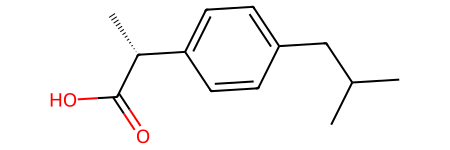

In [18]:
print(f"SMILES:\t{total.SMILES[100]}\nLogBB:\t{total.logBB[100]}")
molecule = molecule_from_smiles(total.iloc[100].SMILES)
print("Molecule:")
molecule

In [19]:
graph = graph_from_molecule(molecule)
print("Graph (including self-loops):")
print("\tatom features\t", graph[0].shape)
print("\tbond features\t", graph[1].shape)
print("\tpair indices\t", graph[2].shape)

Graph (including self-loops):
	atom features	 (15, 29)
	bond features	 (45, 7)
	pair indices	 (45, 2)


In [20]:
def prepare_batch(x_batch, y_batch):
    """Merges (sub)graphs of batch into a single global (disconnected) graph
    """

    atom_features, bond_features, pair_indices = x_batch

    # Obtain number of atoms and bonds for each graph (molecule)
    num_atoms = atom_features.row_lengths()
    num_bonds = bond_features.row_lengths()

    # Obtain partition indices (molecule_indicator), which will be used to
    # gather (sub)graphs from global graph in model later on
    molecule_indices = tf.range(len(num_atoms))
    molecule_indicator = tf.repeat(molecule_indices, num_atoms)

    # Merge (sub)graphs into a global (disconnected) graph. Adding 'increment' to
    # 'pair_indices' (and merging ragged tensors) actualizes the global graph
    gather_indices = tf.repeat(molecule_indices[:-1], num_bonds[1:])
    increment = tf.cumsum(num_atoms[:-1])
    increment = tf.pad(tf.gather(increment, gather_indices), [(num_bonds[0], 0)])
    pair_indices = pair_indices.merge_dims(outer_axis=0, inner_axis=1).to_tensor()
    pair_indices = pair_indices + increment[:, tf.newaxis]
    atom_features = atom_features.merge_dims(outer_axis=0, inner_axis=1).to_tensor()
    bond_features = bond_features.merge_dims(outer_axis=0, inner_axis=1).to_tensor()

    return (atom_features, bond_features, pair_indices, molecule_indicator), y_batch


def MPNNDataset(X, y, batch_size=32, shuffle=False):
    dataset = tf.data.Dataset.from_tensor_slices((X, (y)))
    if shuffle:
        dataset = dataset.shuffle(1024)
    return dataset.batch(batch_size).map(prepare_batch, -1).prefetch(-1)

In [21]:
class EdgeNetwork(layers.Layer):
    def build(self, input_shape):
        self.atom_dim = input_shape[0][-1]
        self.bond_dim = input_shape[1][-1]
        self.kernel = self.add_weight(
            shape=(self.bond_dim, self.atom_dim * self.atom_dim),
            initializer="glorot_uniform",
            name="kernel",
        )
        self.bias = self.add_weight(
            shape=(self.atom_dim * self.atom_dim), initializer="zeros", name="bias",
        )
        self.built = True

    def call(self, inputs):
        atom_features, bond_features, pair_indices = inputs

        # Apply linear transformation to bond features
        bond_features = tf.matmul(bond_features, self.kernel) + self.bias

        # Reshape for neighborhood aggregation later
        bond_features = tf.reshape(bond_features, (-1, self.atom_dim, self.atom_dim))

        # Obtain atom features of neighbors
        atom_features_neighbors = tf.gather(atom_features, pair_indices[:, 1])
        atom_features_neighbors = tf.expand_dims(atom_features_neighbors, axis=-1)

        # Apply neighborhood aggregation
        transformed_features = tf.matmul(bond_features, atom_features_neighbors)
        transformed_features = tf.squeeze(transformed_features, axis=-1)
        aggregated_features = tf.math.unsorted_segment_sum(
            transformed_features,
            pair_indices[:, 0],
            num_segments=tf.shape(atom_features)[0],
        )
        return aggregated_features


class MessagePassing(layers.Layer):
    def __init__(self, units, steps=4, **kwargs):
        super().__init__(**kwargs)
        self.units = units
        self.steps = steps

    def build(self, input_shape):
        self.atom_dim = input_shape[0][-1]
        self.message_step = EdgeNetwork()
        self.pad_length = max(0, self.units - self.atom_dim)
        self.update_step = layers.GRUCell(self.atom_dim + self.pad_length)
        self.built = True

    def call(self, inputs):
        atom_features, bond_features, pair_indices = inputs

        # Pad atom features if number of desired units exceeds atom_features dim.
        # Alternatively, a dense layer could be used here.
        atom_features_updated = tf.pad(atom_features, [(0, 0), (0, self.pad_length)])

        # Perform a number of steps of message passing
        for i in range(self.steps):
            # Aggregate information from neighbors
            atom_features_aggregated = self.message_step(
                [atom_features_updated, bond_features, pair_indices]
            )

            # Update node state via a step of GRU
            atom_features_updated, _ = self.update_step(
                atom_features_aggregated, atom_features_updated
            )
        return atom_features_updated


In [22]:
class PartitionPadding(layers.Layer):
    def __init__(self, batch_size, **kwargs):
        super().__init__(**kwargs)
        self.batch_size = batch_size

    def call(self, inputs):

        atom_features, molecule_indicator = inputs

        # Obtain subgraphs
        atom_features_partitioned = tf.dynamic_partition(
            atom_features, molecule_indicator, self.batch_size
        )

        # Pad and stack subgraphs
        num_atoms = [tf.shape(f)[0] for f in atom_features_partitioned]
        max_num_atoms = tf.reduce_max(num_atoms)
        atom_features_stacked = tf.stack(
            [
                tf.pad(f, [(0, max_num_atoms - n), (0, 0)])
                for f, n in zip(atom_features_partitioned, num_atoms)
            ],
            axis=0,
        )

        # Remove empty subgraphs (usually for last batch in dataset)
        gather_indices = tf.where(tf.reduce_sum(atom_features_stacked, (1, 2)) != 0)
        gather_indices = tf.squeeze(gather_indices, axis=-1)
        return tf.gather(atom_features_stacked, gather_indices, axis=0)


class TransformerEncoderReadout(layers.Layer):
    def __init__(
        self, num_heads=8, embed_dim=64, dense_dim=512, batch_size=32, **kwargs
    ):
        super().__init__(**kwargs)

        self.partition_padding = PartitionPadding(batch_size)
        self.attention = layers.MultiHeadAttention(num_heads, embed_dim)
        self.dense_proj = keras.Sequential(
            [layers.Dense(dense_dim, activation="relu"), layers.Dense(embed_dim),]
        )
        self.layernorm_1 = layers.LayerNormalization()
        self.layernorm_2 = layers.LayerNormalization()
        self.average_pooling = layers.GlobalAveragePooling1D()

    def call(self, inputs):
        x = self.partition_padding(inputs)
        padding_mask = tf.reduce_any(tf.not_equal(x, 0.0), axis=-1)
        padding_mask = padding_mask[:, tf.newaxis, tf.newaxis, :]
        attention_output = self.attention(x, x, attention_mask=padding_mask)
        proj_input = self.layernorm_1(x + attention_output)
        proj_output = self.layernorm_2(proj_input + self.dense_proj(proj_input))
        return self.average_pooling(proj_output)

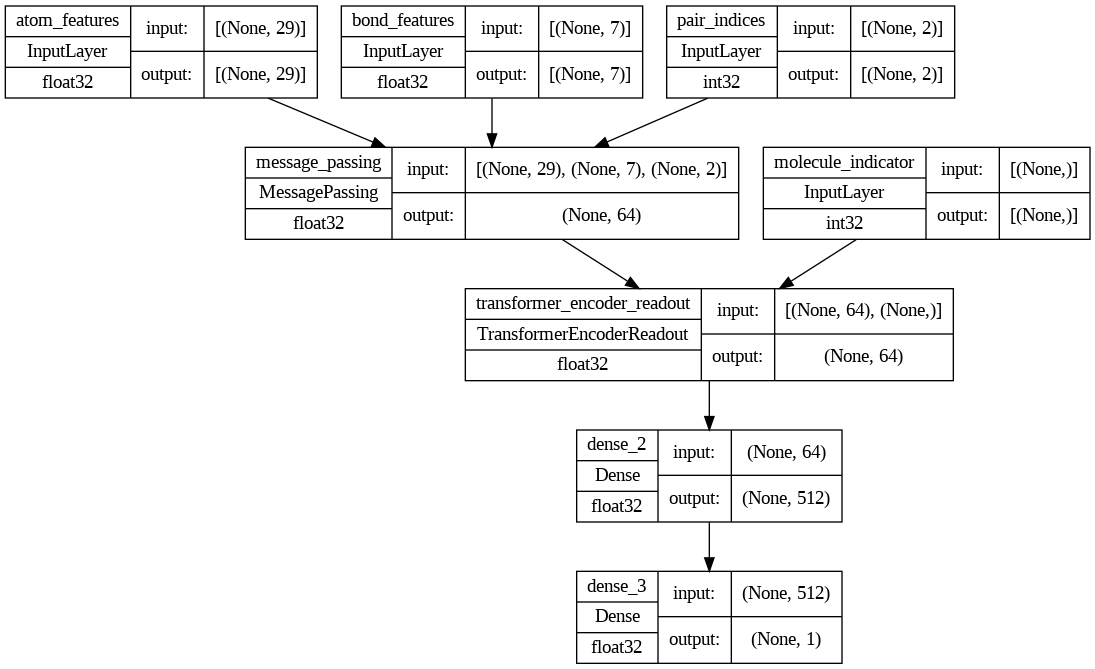

In [23]:
def MPNNModel(
    atom_dim,
    bond_dim,
    batch_size=32,
    message_units=64,
    message_steps=4,
    num_attention_heads=8,
    dense_units=512,
):

    atom_features = layers.Input((atom_dim), dtype="float32", name="atom_features")
    bond_features = layers.Input((bond_dim), dtype="float32", name="bond_features")
    pair_indices = layers.Input((2), dtype="int32", name="pair_indices")
    molecule_indicator = layers.Input((), dtype="int32", name="molecule_indicator")

    x = MessagePassing(message_units, message_steps)(
        [atom_features, bond_features, pair_indices]
    )

    x = TransformerEncoderReadout(
        num_attention_heads, message_units, dense_units, batch_size
    )([x, molecule_indicator])

    x = layers.Dense(dense_units, activation="relu")(x)
    x = layers.Dense(1, activation=None)(x)

    model = keras.Model(
        inputs=[atom_features, bond_features, pair_indices, molecule_indicator],
        outputs=[x],
    )
    return model


mpnn = MPNNModel(
    atom_dim=x_train[0][0][0].shape[0], bond_dim=x_train[1][0][0].shape[0],
)

mpnn.compile(
    loss=keras.losses.MeanSquaredError(),
    optimizer=keras.optimizers.Adam(learning_rate=5e-4),
    metrics=[keras.metrics.MeanAbsoluteError(name="MAE")],
)

keras.utils.plot_model(mpnn, show_dtype=True, show_shapes=True)

In [28]:
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error, mean_squared_error
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
# TEST 1:

TEST 1
Epoch 1/40
27/27 - 18s - loss: 0.4037 - MAE: 0.5040 - val_loss: 0.4276 - val_MAE: 0.5096 - 18s/epoch - 677ms/step
Epoch 2/40
27/27 - 14s - loss: 0.3714 - MAE: 0.4804 - val_loss: 0.3574 - val_MAE: 0.4516 - 14s/epoch - 534ms/step
Epoch 3/40
27/27 - 15s - loss: 0.4044 - MAE: 0.5033 - val_loss: 0.4747 - val_MAE: 0.5417 - 15s/epoch - 545ms/step
Epoch 4/40
27/27 - 15s - loss: 0.3624 - MAE: 0.4743 - val_loss: 0.4360 - val_MAE: 0.5127 - 15s/epoch - 550ms/step
Epoch 5/40
27/27 - 15s - loss: 0.3469 - MAE: 0.4558 - val_loss: 0.4935 - val_MAE: 0.5598 - 15s/epoch - 556ms/step
Epoch 6/40
27/27 - 15s - loss: 0.3544 - MAE: 0.4628 - val_loss: 0.5371 - val_MAE: 0.6013 - 15s/epoch - 566ms/step
Epoch 7/40
27/27 - 15s - loss: 0.3524 - MAE: 0.4626 - val_loss: 0.5037 - val_MAE: 0.5669 - 15s/epoch - 560ms/step
27/27 [==============================] - 6s 225ms/step - loss: 0.3471 - MAE: 0.4453
Train MAE: 0.44531160593032837
Training R-squared: 0.38660671066456365
7/7 [==============================] - 1

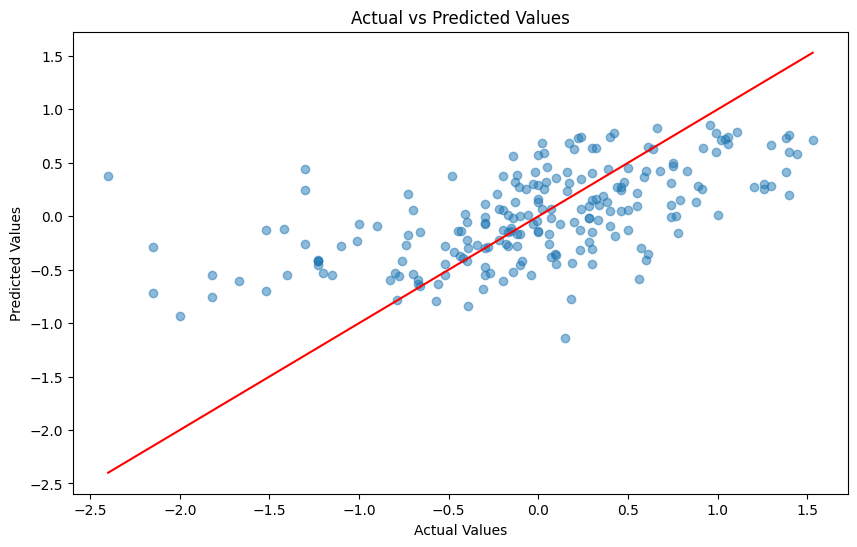

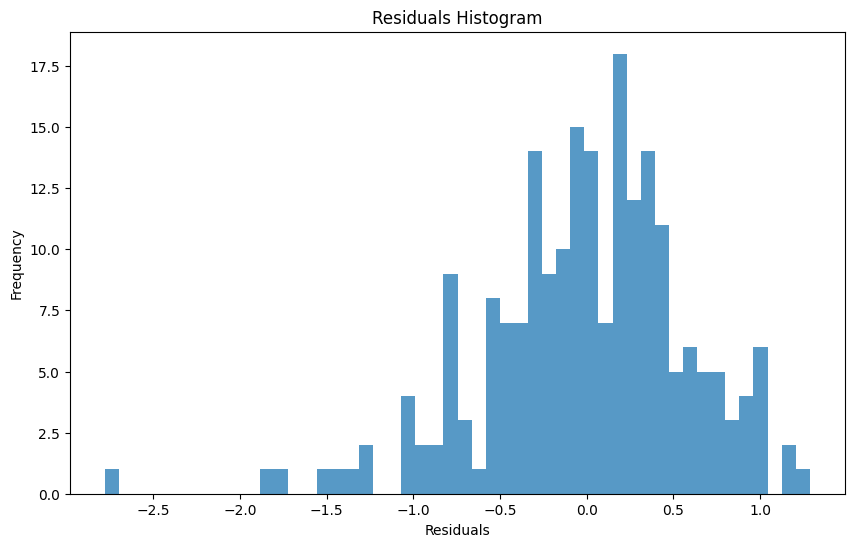

TEST 2
Epoch 1/40
27/27 - 14s - loss: 0.3988 - MAE: 0.5013 - val_loss: 0.4525 - val_MAE: 0.5350 - 14s/epoch - 527ms/step
Epoch 2/40
27/27 - 15s - loss: 0.4047 - MAE: 0.5108 - val_loss: 0.4798 - val_MAE: 0.5304 - 15s/epoch - 569ms/step
Epoch 3/40
27/27 - 14s - loss: 0.3818 - MAE: 0.4876 - val_loss: 0.3707 - val_MAE: 0.4643 - 14s/epoch - 508ms/step
Epoch 4/40
27/27 - 15s - loss: 0.3394 - MAE: 0.4631 - val_loss: 0.3726 - val_MAE: 0.4587 - 15s/epoch - 546ms/step
Epoch 5/40
27/27 - 14s - loss: 0.3399 - MAE: 0.4595 - val_loss: 0.3811 - val_MAE: 0.4716 - 14s/epoch - 520ms/step
Epoch 6/40
27/27 - 14s - loss: 0.3447 - MAE: 0.4622 - val_loss: 0.3887 - val_MAE: 0.4860 - 14s/epoch - 536ms/step
Epoch 7/40
27/27 - 16s - loss: 0.3491 - MAE: 0.4633 - val_loss: 0.4045 - val_MAE: 0.5060 - 16s/epoch - 575ms/step
Epoch 8/40
27/27 - 17s - loss: 0.3442 - MAE: 0.4570 - val_loss: 0.3877 - val_MAE: 0.4798 - 17s/epoch - 624ms/step
27/27 [==============================] - 6s 235ms/step - loss: 0.3223 - MAE: 0.45

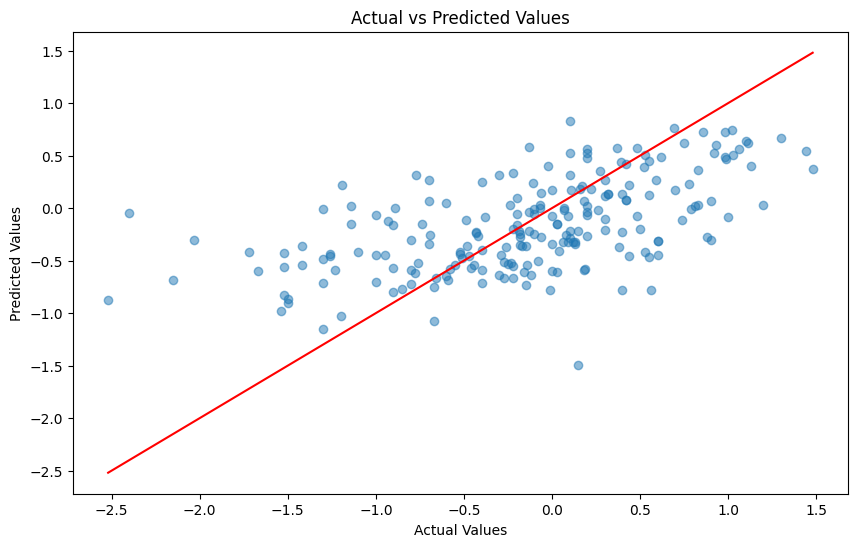

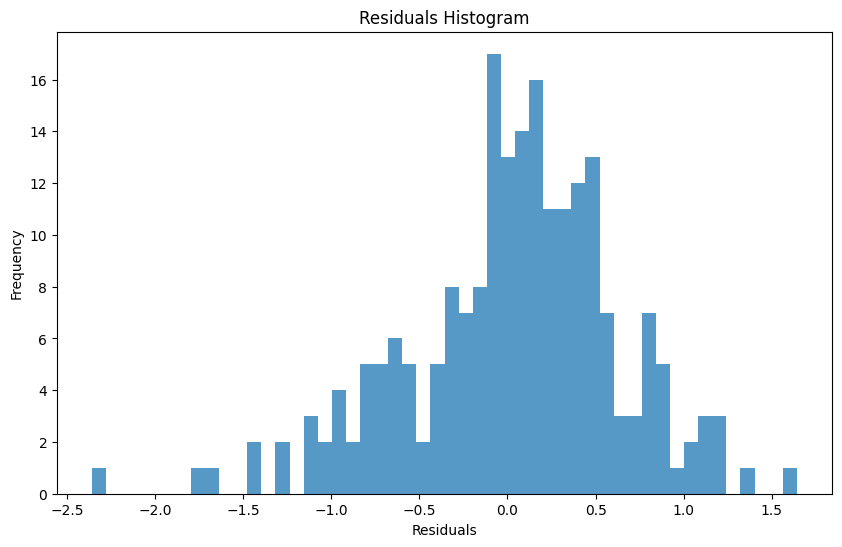

TEST 3
Epoch 1/40
27/27 - 15s - loss: 0.3799 - MAE: 0.4899 - val_loss: 0.2950 - val_MAE: 0.3966 - 15s/epoch - 557ms/step
Epoch 2/40
27/27 - 15s - loss: 0.3785 - MAE: 0.4836 - val_loss: 0.3021 - val_MAE: 0.4093 - 15s/epoch - 538ms/step
Epoch 3/40
27/27 - 15s - loss: 0.3773 - MAE: 0.4816 - val_loss: 0.3769 - val_MAE: 0.4765 - 15s/epoch - 558ms/step
Epoch 4/40
27/27 - 15s - loss: 0.3703 - MAE: 0.4803 - val_loss: 0.3460 - val_MAE: 0.4574 - 15s/epoch - 548ms/step
Epoch 5/40
27/27 - 14s - loss: 0.3545 - MAE: 0.4671 - val_loss: 0.3260 - val_MAE: 0.4356 - 14s/epoch - 528ms/step
Epoch 6/40
27/27 - 30s - loss: 0.3359 - MAE: 0.4568 - val_loss: 0.3196 - val_MAE: 0.4330 - 30s/epoch - 1s/step
27/27 [==============================] - 6s 229ms/step - loss: 0.3133 - MAE: 0.4393
Train MAE: 0.43928736448287964
Training R-squared: 0.44997863674093197
7/7 [==============================] - 1s 165ms/step
<IPython.core.display.Image object>
7/7 [==============================] - 1s 159ms/step - loss: 0.2950 

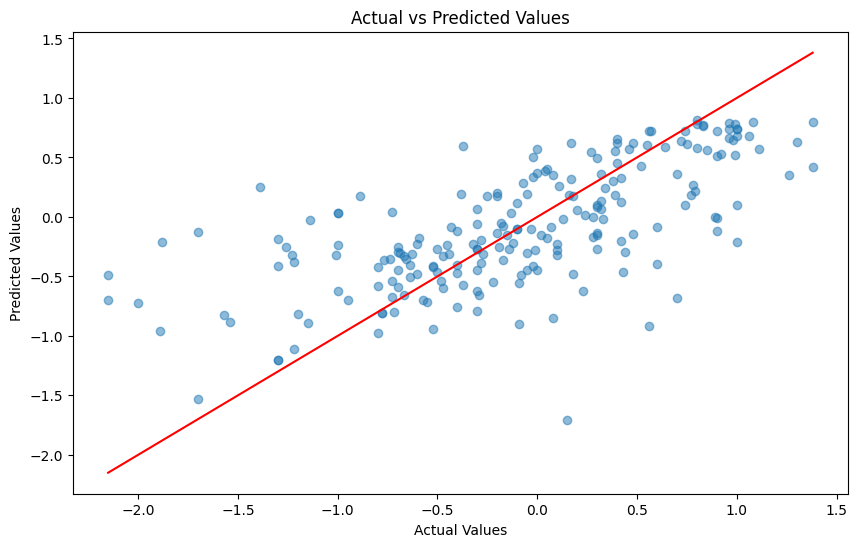

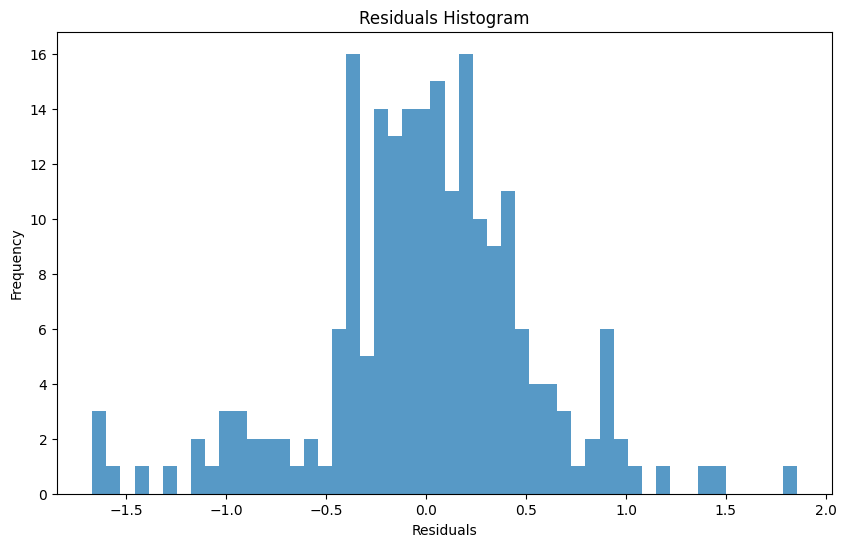

TEST 4
Epoch 1/40
27/27 - 19s - loss: 0.3596 - MAE: 0.4684 - val_loss: 0.3270 - val_MAE: 0.4422 - 19s/epoch - 700ms/step
Epoch 2/40
27/27 - 22s - loss: 0.3493 - MAE: 0.4663 - val_loss: 0.3221 - val_MAE: 0.4287 - 22s/epoch - 821ms/step
Epoch 3/40
27/27 - 19s - loss: 0.3575 - MAE: 0.4657 - val_loss: 0.3229 - val_MAE: 0.4286 - 19s/epoch - 708ms/step
Epoch 4/40
27/27 - 17s - loss: 0.3703 - MAE: 0.4734 - val_loss: 0.3288 - val_MAE: 0.4491 - 17s/epoch - 612ms/step
Epoch 5/40
27/27 - 20s - loss: 0.3708 - MAE: 0.4744 - val_loss: 0.3064 - val_MAE: 0.4354 - 20s/epoch - 730ms/step
Epoch 6/40
27/27 - 17s - loss: 0.3695 - MAE: 0.4728 - val_loss: 0.3375 - val_MAE: 0.4653 - 17s/epoch - 640ms/step
Epoch 7/40
27/27 - 25s - loss: 0.3502 - MAE: 0.4598 - val_loss: 0.3322 - val_MAE: 0.4577 - 25s/epoch - 920ms/step
Epoch 8/40
27/27 - 21s - loss: 0.3320 - MAE: 0.4465 - val_loss: 0.3263 - val_MAE: 0.4565 - 21s/epoch - 773ms/step
Epoch 9/40
27/27 - 15s - loss: 0.3255 - MAE: 0.4451 - val_loss: 0.3163 - val_MAE:

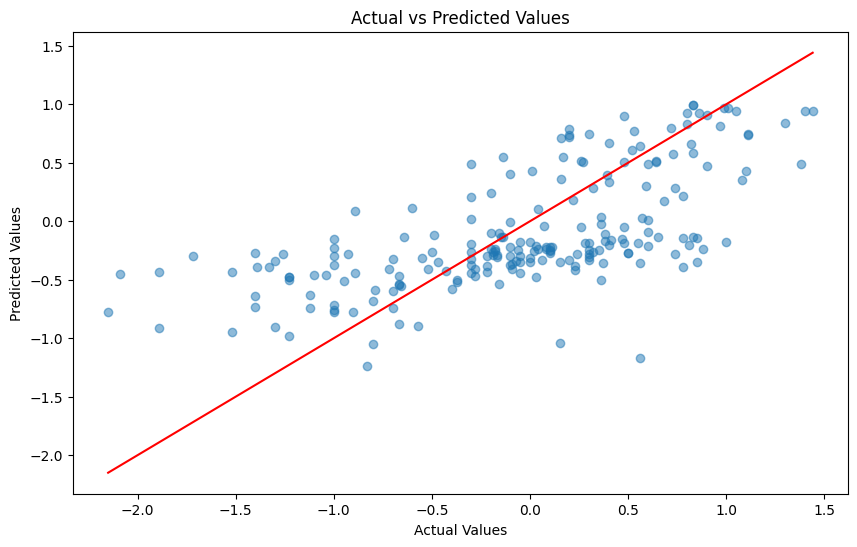

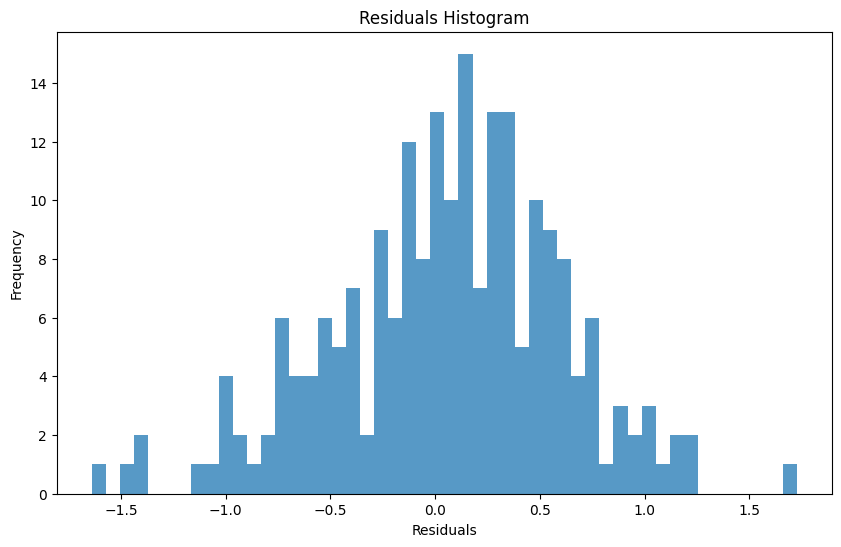

TEST 5
Epoch 1/40
27/27 - 14s - loss: 0.3509 - MAE: 0.4649 - val_loss: 0.2828 - val_MAE: 0.4016 - 14s/epoch - 524ms/step
Epoch 2/40
27/27 - 17s - loss: 0.3556 - MAE: 0.4704 - val_loss: 0.2764 - val_MAE: 0.3953 - 17s/epoch - 645ms/step
Epoch 3/40
27/27 - 13s - loss: 0.3356 - MAE: 0.4595 - val_loss: 0.2907 - val_MAE: 0.4094 - 13s/epoch - 494ms/step
Epoch 4/40
27/27 - 16s - loss: 0.3131 - MAE: 0.4403 - val_loss: 0.2953 - val_MAE: 0.4068 - 16s/epoch - 607ms/step
Epoch 5/40
27/27 - 14s - loss: 0.3306 - MAE: 0.4525 - val_loss: 0.3068 - val_MAE: 0.4088 - 14s/epoch - 532ms/step
Epoch 6/40
27/27 - 15s - loss: 0.3280 - MAE: 0.4471 - val_loss: 0.2888 - val_MAE: 0.3997 - 15s/epoch - 563ms/step
Epoch 7/40
27/27 - 15s - loss: 0.3182 - MAE: 0.4425 - val_loss: 0.2739 - val_MAE: 0.3924 - 15s/epoch - 552ms/step
Epoch 8/40
27/27 - 15s - loss: 0.3246 - MAE: 0.4522 - val_loss: 0.2789 - val_MAE: 0.4001 - 15s/epoch - 542ms/step
Epoch 9/40
27/27 - 15s - loss: 0.3042 - MAE: 0.4323 - val_loss: 0.2919 - val_MAE:

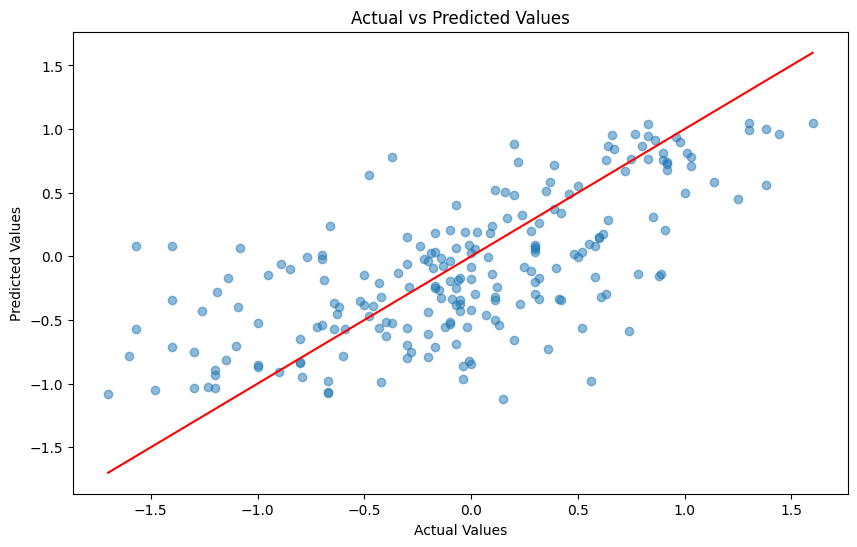

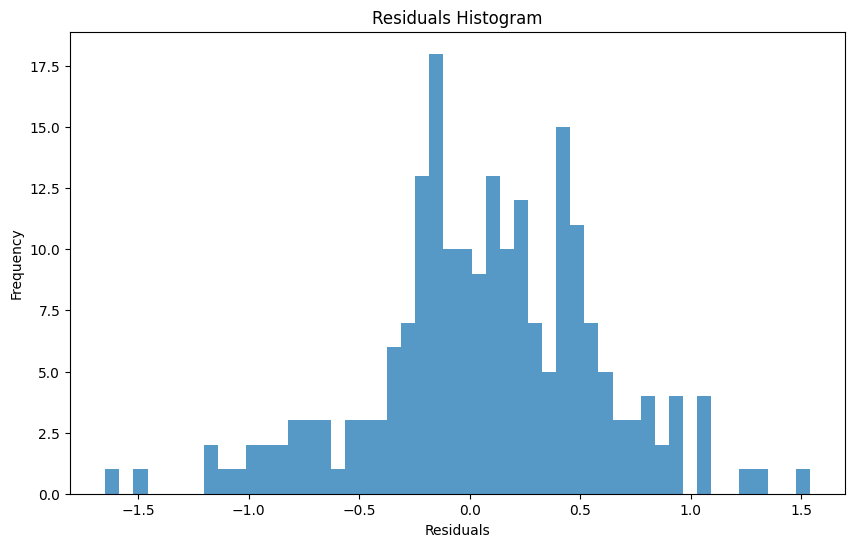

In [30]:
for i in range(5):
  print("TEST",i+1)
  permuted_indices = np.random.permutation(np.arange(total.shape[0]))

  # Train set: 80 % of data
  train_index = permuted_indices[: int(total.shape[0] * 0.8)]
  x_train = graphs_from_smiles(total.iloc[train_index].SMILES)
  y_train = total.iloc[train_index].logBB

  # Valid set: 20 % of data
  valid_index = permuted_indices[int(total.shape[0] * 0.8) : ]
  x_valid = graphs_from_smiles(total.iloc[valid_index].SMILES)
  y_valid = total.iloc[valid_index].logBB

  train_dataset = MPNNDataset(x_train, y_train)
  valid_dataset = MPNNDataset(x_valid, y_valid)

  early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

  history = mpnn.fit(
      train_dataset,
      validation_data=valid_dataset,
      epochs=40,
      verbose=2,
      callbacks=[early_stopping]
  )

  train_predictions = mpnn.predict(train_dataset)
  train_loss, train_mae = mpnn.evaluate(train_dataset)
  print(f"Train MAE: {train_mae}")

  r2_train = r2_score(y_train, train_predictions)
  print(f"Training R-squared: {r2_train}")

  molecules = [molecule_from_smiles(total.SMILES.values[index]) for index in valid_index]
  y_true = [total.logBB.values[index] for index in valid_index]
  y_pred = tf.squeeze(mpnn.predict(valid_dataset), axis=1)

  legends = [f"y_true/y_pred = {y_true[i]}/{y_pred[i]:.2f}" for i in range(len(y_true))]
  print(MolsToGridImage(molecules, molsPerRow=4, legends=legends))

  valid_dataset = MPNNDataset(x_valid, y_valid)
  test_loss, test_mae = mpnn.evaluate(valid_dataset)
  print(f"Test Loss: {test_loss}")
  print(f"Test MAE: {test_mae}")

  predictions = mpnn.predict(valid_dataset)
  r2 = r2_score(y_valid, predictions)
  print(f"R^2 Score: {r2}")

  # Load the test dataset and make predictions
  test_dataset = MPNNDataset(x_valid, y_valid)
  y_pred = mpnn.predict(valid_dataset)

  # Ensure y_test and y_pred are numpy arrays
  y_test = np.array(y_valid)
  y_pred = np.array(y_pred).squeeze()  # Remove the extra dimension if it exists

  # Check the shape of y_test and y_pred
  print(f"Shape of y_test: {y_test.shape}")
  print(f"Shape of y_pred: {y_pred.shape}")

  # Calculate metrics
  mae = mean_absolute_error(y_test, y_pred)
  mse = mean_squared_error(y_test, y_pred)

  print(f"Mean Absolute Error (MAE): {mae}")
  print(f"Mean Squared Error (MSE): {mse}")

  # Plot actual vs predicted values
  plt.figure(figsize=(10, 6))
  plt.scatter(y_test, y_pred, alpha=0.5)
  plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red')  # Line of perfect prediction
  plt.xlabel('Actual Values')
  plt.ylabel('Predicted Values')
  plt.title('Actual vs Predicted Values')
  plt.show()

  # Plot residuals (errors)
  residuals = y_test - y_pred
  plt.figure(figsize=(10, 6))
  plt.hist(residuals, bins=50, alpha=0.75)
  plt.xlabel('Residuals')
  plt.ylabel('Frequency')
  plt.title('Residuals Histogram')
  plt.show()



In [32]:
train_mae_1 = 0.44531160593032837
train_mae_2 = 0.45525139570236206
train_mae_3 = 0.43928736448287964
train_mae_4 = 0.43568098545074463
train_mae_5 = 0.39364707469940186

train_rs_1 = 0.38660671066456365
train_rs_2 = 0.430523221511968
train_rs_3 = 0.44997863674093197
train_rs_4 = 0.4515725235221648
train_rs_5 = 0.5604471537340141

test_mae_1 = 0.45159289240837097
test_mae_2 = 0.4642890989780426
test_mae_3 = 0.3966168463230133
test_mae_4 = 0.43542706966400146
test_mae_5 = 0.40246686339378357

test_rs_1 = 0.3536022492445058
test_rs_2 = 0.3318630037667568
test_rs_3 = 0.45737184126391284
test_rs_4 = 0.42594729398366526
test_rs_5 = 0.4334944202597455



In [33]:
train_mae=[train_mae_1, train_mae_2, train_mae_3, train_mae_4, train_mae_5]
train_rs=[train_rs_1, train_rs_2, train_rs_3, train_rs_4, train_rs_5]
test_mae=[test_mae_1, test_mae_2, test_mae_3, test_mae_4, test_mae_5]
test_rs=[test_rs_1, test_rs_2, test_rs_3, test_rs_4, test_rs_5]
train_mae_sum=0
train_rs_sum=0
test_mae_sum=0
test_rs_sum=0
for i in range(5):
  train_mae_sum+=train_mae[i]
  train_rs_sum+=train_rs[i]
  test_mae_sum+=test_mae[i]
  test_rs_sum+=test_rs[i]
print("mean of train mae:",train_mae_sum/5)
print("mean of train rs:",train_rs_sum/5)
print("mean of test mae:",test_mae_sum/5)
print("mean of test rs:",test_rs_sum/5)

mean of train mae: 0.4338356852531433
mean of train rs: 0.45582564923472846
mean of test mae: 0.43007855415344237
mean of test rs: 0.40045576170371716


In [34]:
import numpy as np
import scipy.stats as stats

mae_values = np.array(train_mae)
r2_values = np.array(train_rs)

def calculate_confidence_interval(data, confidence=0.95):
    n = len(data)
    mean = np.mean(data)
    std_err = np.std(data, ddof=1) / np.sqrt(n)
    t_score = stats.t.ppf((1 + confidence) / 2.0, n - 1)
    margin_of_error = t_score * std_err
    return mean - margin_of_error, mean + margin_of_error


mae_conf_interval = calculate_confidence_interval(mae_values)
print(f"95% Confidence Interval for MAE: {mae_conf_interval}")


r2_conf_interval = calculate_confidence_interval(r2_values)
print(f"95% Confidence Interval for R-squared: {r2_conf_interval}")


95% Confidence Interval for MAE: (0.40446186855392596, 0.46320950195236066)
95% Confidence Interval for R-squared: (0.37624910427850333, 0.5354021941909536)


In [35]:
import numpy as np
import scipy.stats as stats

mae_values = np.array(test_mae)
r2_values = np.array(test_rs)

def calculate_confidence_interval(data, confidence=0.95):
    n = len(data)
    mean = np.mean(data)
    std_err = np.std(data, ddof=1) / np.sqrt(n)
    t_score = stats.t.ppf((1 + confidence) / 2.0, n - 1)
    margin_of_error = t_score * std_err
    return mean - margin_of_error, mean + margin_of_error


mae_conf_interval = calculate_confidence_interval(mae_values)
print(f"95% Confidence Interval for MAE: {mae_conf_interval}")


r2_conf_interval = calculate_confidence_interval(r2_values)
print(f"95% Confidence Interval for R-squared: {r2_conf_interval}")


95% Confidence Interval for MAE: (0.39311987667323783, 0.4670372316336469)
95% Confidence Interval for R-squared: (0.33278499018633567, 0.46812653322109865)
